In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from helpers.assess import make_classification_report, make_confusion_matrix
from helpers.split import make_train_test_split, tag_label_feature_split

In [2]:
def knn_experiment(dataset, n_neighbors=5):

    dataset_name = os.path.basename(dataset).split(".")[0]
    experiment_label = "knn_" + dataset_name
    print(f"\n\nExperiment: {experiment_label}\n")
    
    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard"
    )

    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(
        y_train,
        model=model,
        x=X_train_std,
        digits=4,
        label_encoder=le,
        print_report=True,
        save_result=True,
        result_filename="rich_results.json",
        model_name=experiment_label+"_train",
        repeat=True        
    )
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(
        y_test, 
        y_pred=predictions, 
        digits=4, 
        label_encoder=le, 
        print_report=True,
        save_result=True,
        result_filename="rich_results.json",
        model_name=experiment_label+"_train",
        repeat=True
    )

    # generate confusion matrix and
    # display nicely with seaborn

    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{dataset_name} test (row normalized)",
    )

    return model



Experiment: logistic_regression_dataset_00_all

Train: train_accuracy = 0.765105

Test logistic_regression_dataset_00_all_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.5819  0.4465    0.5053      374  0.5002
  genre_classical     0.8780  0.9211    0.8991     4221  0.8653
    genre_country     0.7541  0.5627    0.6445      327  0.6457
      genre_disco     0.5210  0.6021    0.5586      289  0.5519
     genre_hiphop     0.7828  0.6908    0.7339     1701  0.7082
       genre_jazz     0.6422  0.7043    0.6718     1241  0.6456
      genre_metal     0.8427  0.7248    0.7793      665  0.7734
        genre_pop     0.6912  0.7810    0.7334     4274  0.6392
     genre_reggae     0.7531  0.6193    0.6797      788  0.6692
       genre_rock     0.7990  0.7181    0.7564     3200  0.7054
                                              

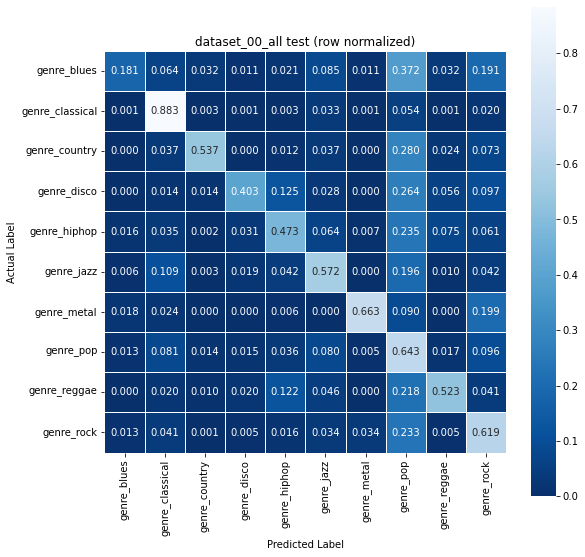



Experiment: logistic_regression_dataset_01_mean

Train: train_accuracy = 0.668501

Test logistic_regression_dataset_01_mean_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4496  0.3102    0.3671      374  0.3619
  genre_classical     0.7632  0.9218    0.8351     4221  0.7805
    genre_country     0.6502  0.4434    0.5273      327  0.5297
      genre_disco     0.3646  0.3495    0.3569      289  0.3461
     genre_hiphop     0.5829  0.5620    0.5723     1701  0.5260
       genre_jazz     0.5656  0.4658    0.5108     1241  0.4790
      genre_metal     0.7215  0.6466    0.6820      665  0.6709
        genre_pop     0.6086  0.6724    0.6390     4274  0.5115
     genre_reggae     0.6411  0.3401    0.4444      788  0.4493
       genre_rock     0.7286  0.6434    0.6834     3200  0.6176
                                            

In [ ]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    knn_experiment(dataset)